# Tugas Analisis Multimedia: Audio, Gambar, Video

**Mata Kuliah:** Sistem & Teknologi Multimedia  
**Nama:** Fathan Andi Kartagama   
**NIM:** 122140055  

In [59]:
# Import Library (Satu-satunya sel kode dalam template ini)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
from PIL import Image
import cv2
from IPython.display import Audio, HTML, display
import os

# Set matplotlib untuk menampilkan plot inline
%matplotlib inline

# Tampilkan versi library untuk dokumentasi
print("Library versions:")
print(f"NumPy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Librosa: {librosa.__version__}")
print(f"OpenCV: {cv2.__version__}")

# Tambahkan import lain jika diperlukan saat mengerjakan tugas

Library versions:
NumPy: 2.2.6
Matplotlib: 3.10.5
Librosa: 0.11.0
OpenCV: 4.12.0


## Checklist Kelengkapan (Centang ✅ saat selesai)

### 🎵 Bagian Audio
- [✅] Muat audio dan tampilkan metadata (durasi, sample rate, jumlah kanal)
- [✅] Tampilkan waveform dengan label sumbu yang jelas
- [✅] Tampilkan spectrogram dalam skala log-dB dengan colorbar
- [✅] Tampilkan MFCC (minimal 13 koefisien) sebagai heatmap
- [✅] Berikan interpretasi dan analisis untuk setiap visualisasi audio

### 🖼️ Bagian Gambar
- [✅] Tampilkan gambar dengan benar dalam format RGB
- [✅] Tampilkan informasi dasar (dimensi, jumlah kanal, dtype)
- [✅] Tampilkan histogram warna untuk channel R, G, B
- [✅] Berikan analisis hubungan histogram dengan kesan visual gambar

### 📹 Bagian Video
- [✅] Tampilkan metadata video (resolusi, fps, frame count, durasi)
- [✅] Tampilkan 3 frame representatif (awal, tengah, akhir)
- [✅] Konversi BGR ke RGB dengan benar untuk visualisasi
- [✅] Analisis kesesuaian parameter video dengan use case

### 📝 Analisis & Dokumentasi
- [✅] Setiap bagian memiliki interpretasi dan analisis ringkas
- [✅] Perbandingan representasi ketiga jenis media
- [✅] Kesimpulan pembelajaran dan refleksi
- [✅] Semua sumber data dan referensi dicantumkan

# Pendahuluan

## Apa itu Data Multimedia?

Data multimedia adalah informasi yang dikodekan dalam berbagai format untuk merepresentasikan dunia nyata:

- **Audio (1D)**: Sinyal satu dimensi yang berubah terhadap waktu
  - Contoh: musik, suara, speech
  - Representasi: amplitudo vs waktu
  
- **Gambar (2D)**: Matriks nilai intensitas dalam ruang dua dimensi
  - Contoh: foto, ilustrasi, grafik
  - Representasi: intensitas pixel pada koordinat (x,y)
  
- **Video (2D + Waktu)**: Rangkaian frame (gambar) yang ditampilkan berurutan
  - Contoh: film, rekaman, animasi
  - Representasi: frame berubah terhadap waktu dengan frame rate tertentu

## Tujuan Tugas

Memahami representasi dasar dan teknik visualisasi fundamental untuk setiap jenis media multimedia, termasuk:
- Cara memuat dan membaca file multimedia
- Ekstraksi informasi metadata yang penting
- Visualisasi yang informatif dan mudah dipahami
- Interpretasi hasil analisis secara kontekstual

## Cara Kerja

1. Isi setiap bagian sesuai instruksi yang diberikan
2. Tambahkan sel kode di tempat yang ditandai dengan "TODO"
3. Berikan interpretasi dan analisis setelah setiap visualisasi
4. Pastikan semua plot memiliki judul, label, dan keterangan yang jelas

# Bagian A — Audio

### A1. Deskripsi Data

**TODO:** Jelaskan audio yang akan Anda analisis:
- Jenis audio: Musik
- Sumber: [Take A Drive by Rex Orange County](https://youtu.be/P8-3tc_qfbQ?si=pcWeAhvnk9k8i-kE)
- Format file: WAV
- Alasan pemilihan: New Released Song dan Kolaborasi bareng Pharrel Williams

**Path file:** `data\Rex Orange County-Take A Drive.wav` 

---
### A2. TODO: Muat & Metadata

**Instruksi:**
Tulis kode untuk memuat file audio dan menampilkan metadata dasar:
- Sample rate (Hz)
- Durasi (detik)
- Jumlah kanal (mono/stereo)
- Jumlah total sampel

In [60]:
# Path file audio
audio_path = os.path.join('data', 'Rex Orange County-Take A Drive.wav')

# Load file audio
y, sr = librosa.load(audio_path, sr=None, mono=False)

# Load Metadata using SoundFile
with sf.SoundFile(audio_path) as f:
    sample_rate = f.samplerate
    n_samples = len(f)
    duration = len(f) / f.samplerate
    n_channels = f.channels

# Print Metadata
print(f"Sample Rate: {sample_rate} Hz")
print(f"Number of Samples: {n_samples}")
print(f"Duration: {duration:.2f} seconds")
print(f"Number of Channels: {n_channels} ({'Mono' if n_channels == 1 else 'Stereo'})")
    

Sample Rate: 44100 Hz
Number of Samples: 9924608
Duration: 225.05 seconds
Number of Channels: 2 (Stereo)


---

### A3. TODO: Waveform

**Instruksi:**
Plot waveform audio dengan:
- Sumbu X: waktu (detik)
- Sumbu Y: amplitudo
- Judul dan label sumbu yang jelas

**Analisis yang diperlukan:**
Jelaskan apa yang Anda lihat dari waveform (pola amplitudo, bagian keras/pelan, dll.)

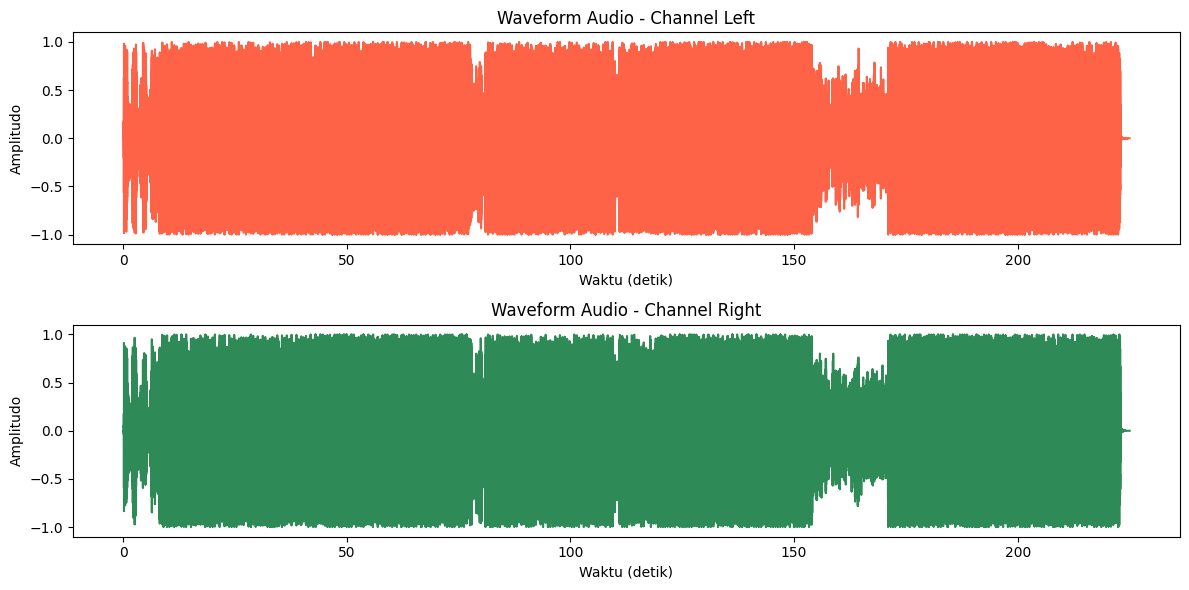

In [61]:
# Load audio (pakai sample rate asli)
try:
    y, sr = librosa.load(audio_path, sr=None, mono=False)
except Exception as e:
    print(f"Error loading audio: {e}")
    y, sr = None, None
# === Downsampling untuk plotting cepat ===
# ambil setiap nth sample (misalnya 10) biar lebih ringan saat plot
downsample = 10
if n_channels == 1:
    y_plot = y[::downsample]
else:
    y_plot = y[:, ::downsample]

time = np.linspace(0, duration, num=y_plot.shape[-1])

# === Plot Waveform ===
plt.figure(figsize=(12, 6))

if n_channels == 1:
    plt.plot(time, y_plot, color="steelblue")
    plt.title("Waveform Audio (Mono)", fontsize=14)
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")
else:
    plt.subplot(2, 1, 1)
    plt.plot(time, y_plot[0], color="tomato")
    plt.title("Waveform Audio - Channel Left", fontsize=12)
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")

    plt.subplot(2, 1, 2)
    plt.plot(time, y_plot[1], color="seagreen")
    plt.title("Waveform Audio - Channel Right", fontsize=12)
    plt.xlabel("Waktu (detik)")
    plt.ylabel("Amplitudo")

plt.tight_layout()
plt.show()

Dari gambar waveform tersebut terlihat bahwa audionya adalah sekitar 4 menit dan memiliki distribusi yang sangat padat hampir di semua bagian track (dari awal sampai akhir). Channel kiri dan kanan keliatan mirip tapi harusnya tidak identik. Hampir sepanjang durasi, amplitudo dari sinyal audio berada di dekat batas maksimum. Kemudian terdapat penurunan amplitudo di sekitar menit 2.5 karena memang di sekitar waktu itu audio musiknya lumayan turun volumenya

---

### A4. TODO: Spectrogram log-dB

**Instruksi:**
Hitung STFT dan tampilkan spectrogram dalam skala log-dB:
- Gunakan parameter standar (n_fft=1024, hop_length=256)
- Tampilkan dengan colorbar
- Label sumbu: waktu (detik) dan frekuensi (Hz)

**Analisis yang diperlukan:**
Jelaskan perbedaan informasi yang didapat dari spectrogram dibanding waveform.

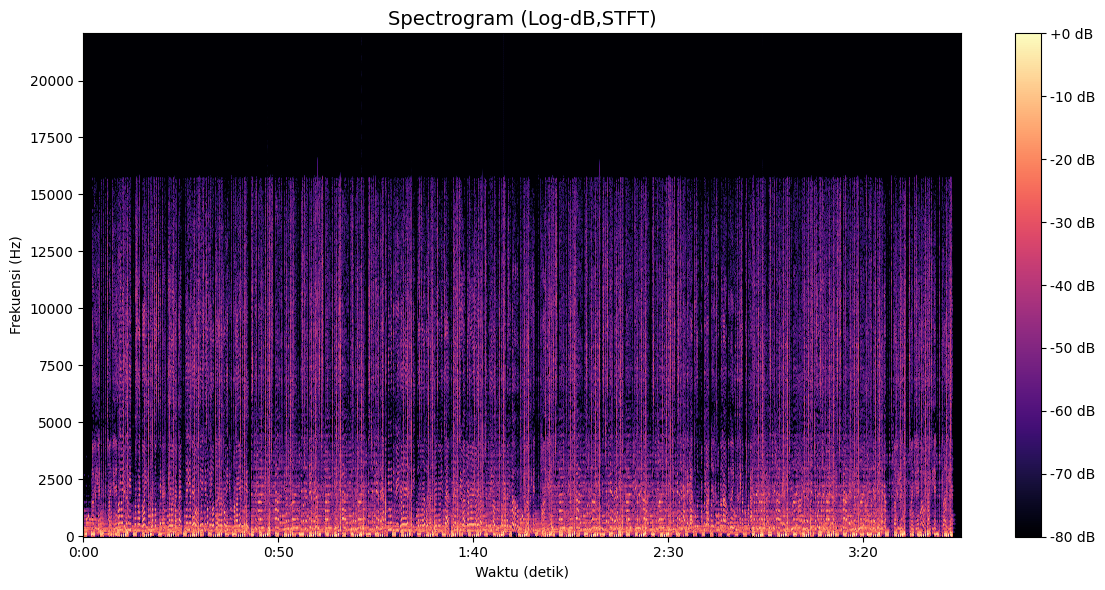

In [62]:
# Ubah audio ke mono (jika stereo)
if n_channels > 1:
    y_mono = librosa.to_mono(y)
else:
    y_mono = y

# Parameter STFT
n_fft = 1024  # Panjang jendela FFT
hop_length = 256  # Jarak antar jendela

# Short-Time Fourier Transform (STFT)
D = librosa.stft(y_mono, n_fft=n_fft, hop_length=hop_length)

# Ubah ke magnitude kemudian ke decibel
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot Spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='hz', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log-dB,STFT)', fontsize=14)
plt.xlabel('Waktu (detik)')
plt.ylabel('Frekuensi (Hz)')
plt.tight_layout()
plt.show()


Dari spectogram tersebut kita bisa lihat bahwa audio ini dominan di frekuensi rendah - menengah (0-5kHz). Karena di lower frekuensi banyak instrumen seperti bass, drum, dan vokal. Sepanjang durasi, intensitasnya cukup konsisten dan padat. Di sekitar menit 2.35 terdapat penurunan intensitas karena pada part tersebut memang cukup tenang

---

### A5. TODO: MFCC

**Instruksi:**
Hitung dan tampilkan minimal 13 koefisien MFCC sebagai heatmap:
- Sumbu X: waktu (frame)
- Sumbu Y: koefisien MFCC (1-13)
- Gunakan colorbar dan judul yang jelas

**Analisis yang diperlukan:**
Interpretasi sederhana: apakah pola MFCC stabil atau berubah-ubah? Apa potensi maknanya?

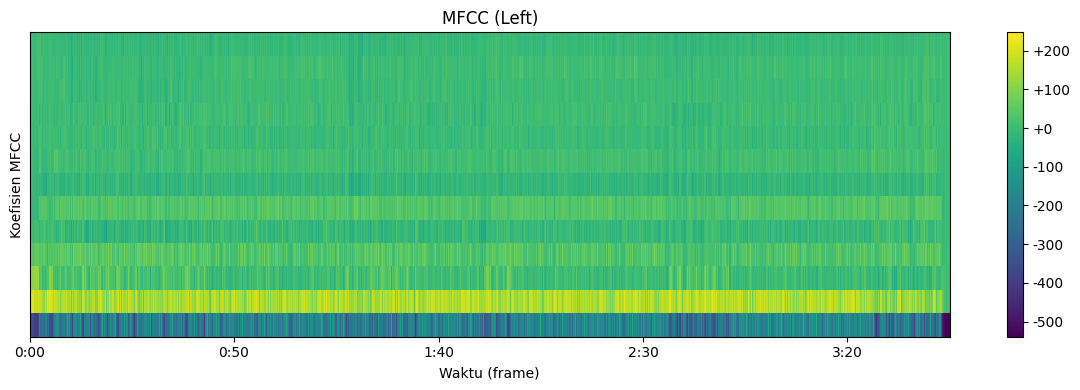

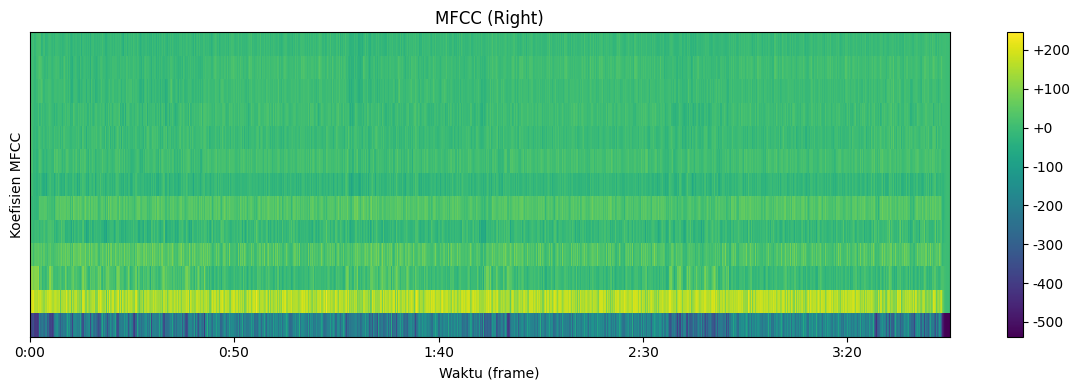

In [63]:
# Parameter MFCC
n_mfcc = 13  # Jumlah koefisien MFCC
n_fft = 1024  # Panjang jendela FFT
hop_length = 256  # Jarak antar jendela

# === Fungsi untuk hitung & plot MFCC ===
def plot_mfcc(y_channel, sr, channel_name="Mono"):
    mfccs = librosa.feature.mfcc(
        y=y_channel, sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length
    )
    
    plt.figure(figsize=(12, 4))
    img = librosa.display.specshow(
        mfccs, x_axis="time", sr=sr, hop_length=hop_length, cmap="viridis"
    )
    plt.colorbar(img, format="%+2.f")
    plt.title(f"MFCC ({channel_name})")
    plt.xlabel("Waktu (frame)")
    plt.ylabel("Koefisien MFCC")
    plt.tight_layout()
    plt.show()

# === Cek Mono/Stereo ===
if y.ndim == 1:
    # Mono
    plot_mfcc(y, sr, channel_name="Mono")
else:
    # Stereo -> Kanal kiri
    plot_mfcc(y[0], sr, channel_name="Left")
    # Stereo -> Kanal kanan
    plot_mfcc(y[1], sr, channel_name="Right")


Kalo dilihat dari pola MFCCnya, musik ini cenderung stabil dari awal hingga akhir. Warnanya di heatmap juga tidak banyak berubah sebab instrumen dengan latar musiknya konsisten. Biasanya kalo musiknya rame punya banyak variasi instrumen gitu atau nadanya berubah berubah, pola MFCC bakalan lebih berwarna dan berubah-ubah

---

### A6. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

1. **Perbedaan insight:** Apa perbedaan informasi yang didapat dari waveform versus spectrogram?

    *Jawaban Anda:*

    Spectrogram lebih informatif untuk memahami isi audio dan karakter suara yang ada di dalamnya. Sementara itu, waveform lebih berguna untuk melihat pola dasar seperti kapan suara mulai, berhenti, naik, atau turun. Bentuk waveform ini mirip dengan tampilan visual audio yang biasanya kita lihat di aplikasi editing video seperti CapCut atau Adobe Premiere Pro dan juga di aplikasi editor musik seperti Audacity 

2. **Pembelajaran dari MFCC:** Apa yang Anda pelajari dari visualisasi MFCC audio ini?

    *Jawaban Anda:*
    
    Kalo dilihat dari pola MFCC di kedua kanal, musik ini cenderung stabil dari awal sampai akhir. Warna heatmapnya juga ga banyak berubah, jadi bisa dibilang timbre atau warna suaranya itu konsisten ga banyak variasi. Musiknya lebih ke arah repetitif khas musik produksi Pharrell Williams
    

# Bagian B — Gambar

### B1. Deskripsi Data

**TODO:** Jelaskan gambar yang akan Anda analisis:
- Jenis gambar: Ilustrasi Cover Single Lagu Digital IU - Bye Summer
- Sumber: [Postingan Instagram IU](https://www.instagram.com/p/DOZiPSnkprB/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA==)
- Format file: JPG
- Alasan pemilihan: Saya fans IU dan Ilustrasi cover single terbarunya ini bagus banget, penuh warna

**Path file:** `data\IU-ByeSummer.jpg`

---

### B2. TODO: Baca & Tampilkan (RGB)

**Instruksi:**
Baca gambar dan tampilkan dengan benar dalam format RGB:
- Pastikan konversi warna benar (ingat perbedaan BGR vs RGB di OpenCV)
- Berikan judul yang deskriptif
- Hilangkan axis untuk tampilan yang bersih

**Analisis yang diperlukan:**
Jelaskan gambar secara ringkas (objek dominan, kondisi pencahayaan, komposisi warna).

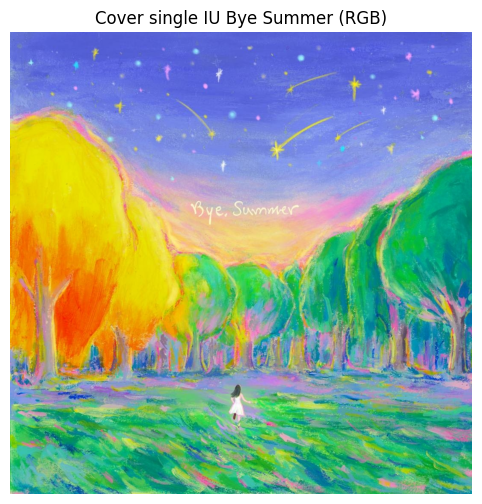

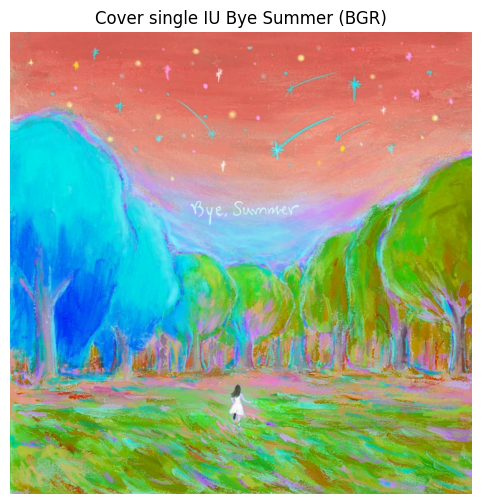

In [64]:
# Path file image
image_path = os.path.join('data', 'IU-ByeSummer.jpg')

# Load image dan display menggunakan OpenCV + Matplotlib
image = cv2.imread(image_path)
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imgbgr = image  # Gambar dalam format BGR asli dari OpenCV

# Tampilkan gambar asli
plt.figure(figsize=(8, 6))
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Cover single IU Bye Summer (RGB)')
plt.show()
# Tampilkan gambar BGR
plt.figure(figsize=(8, 6))
plt.imshow(imgbgr)
plt.axis('off')
plt.title('Cover single IU Bye Summer (BGR)')
plt.show()

Ilustrasi dari cover single terbarunya IU. Di mana object yang paling dominan adalah pepohonan dan rumput. Pencahayaannya sendiri menggambarkan suasana senja menuju malam hari karena gradasi warna langit dari jingga ke ungu kebiruan serta dihiasi dengan bintang dan meteor. Komposisi warna cerah dan kontras kuning,oranye, hijau, ungu, dan biru

---

### B3. TODO: Informasi Dasar

**Instruksi:**
Tampilkan informasi metadata gambar:
- Dimensi (Height × Width)
- Jumlah kanal
- Tipe data (dtype)
- Mode warna (jika relevan)
- Ukuran file dalam memori

**Analisis yang diperlukan:**
Jelaskan mengapa informasi ini penting untuk tahap preprocessing atau analisis lanjutan.

In [65]:
# Informasi dasar gambar
height, width, channels = image.shape
dtype = image.dtype
file_size = os.path.getsize(image_path)
mode="RGB" if channels == 3 else "Grayscale"

# Print informasi gambar
print(f"Image Width: {width} pixels")
print(f"Image Height: {height} pixels")
print(f"Image Dimensions: {image.shape}")
print(f"Image Channels: {channels}")
print(f"Image Data Type: {dtype}")
print(f"Image File Size: {file_size / 1024:.2f} KB")
print(f"Image Mode: {mode}")

Image Width: 1080 pixels
Image Height: 1080 pixels
Image Dimensions: (1080, 1080, 3)
Image Channels: 3
Image Data Type: uint8
Image File Size: 505.08 KB
Image Mode: RGB


---

### B4. TODO: Histogram Warna

**Instruksi:**
Tampilkan histogram distribusi intensitas untuk channel R, G, B:
- Range: 0-255
- Plot terpisah atau overlay dengan warna sesuai channel
- Label sumbu: intensitas pixel dan frekuensi
- Legend yang jelas

**Analisis yang diperlukan:**
Analisis: channel mana yang dominan? Bagaimana kontras gambar? Seperti apa sebaran intensitasnya?

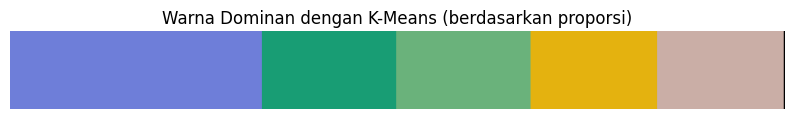

#1: RGB(110, 126, 217) — 32.6%
#2: RGB(24, 157, 116) — 17.4%
#3: RGB(106, 178, 123) — 17.4%
#4: RGB(228, 178, 15) — 16.4%
#5: RGB(202, 174, 166) — 16.2%


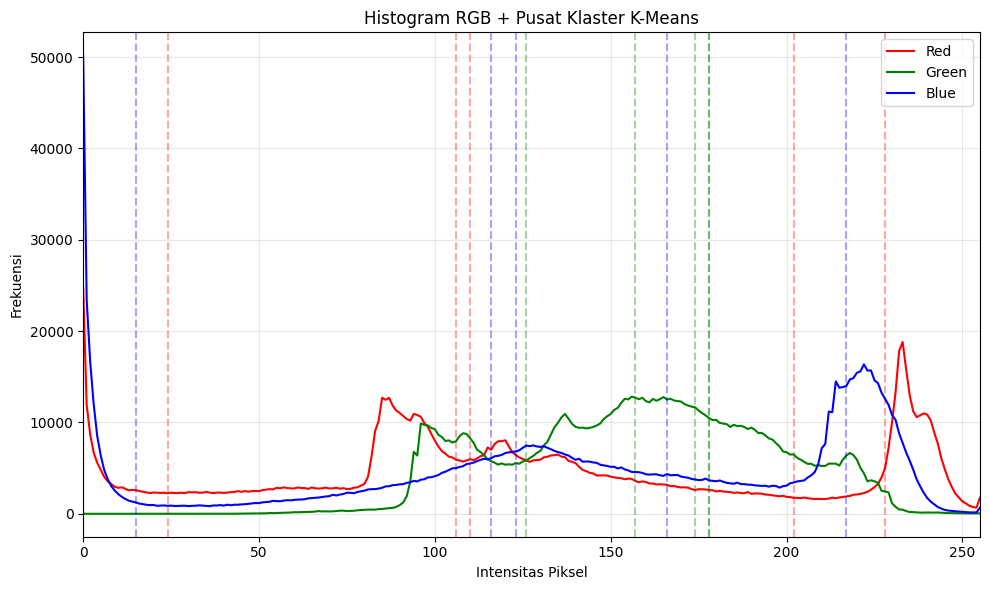

Total piksel pada gambar: 1166400


In [66]:
# === Ekstraksi warna dominan dengan K-Means ===

# Ubah data gambar menjadi array piksel (N x 3) dalam format RGB float32
pixels = img_rgb.reshape(-1, 3).astype(np.float32)

# Sampling acak opsional (agar lebih cepat untuk gambar dengan jumlah piksel sangat besar)
max_samples = 100_000
if pixels.shape[0] > max_samples:
    idx = np.random.choice(pixels.shape[0], max_samples, replace=False)
    data = pixels[idx]
else:
    data = pixels

# Jalankan K-Means untuk mencari K warna dominan
K = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 50, 0.5)
flags = cv2.KMEANS_PP_CENTERS
compactness, labels, centers = cv2.kmeans(data, K, None, criteria, 5, flags)

# Hitung proporsi masing-masing klaster dan urutkan berdasarkan dominasi terbesar
labels = labels.flatten()
counts = np.bincount(labels, minlength=K).astype(np.float32)
props = counts / counts.sum()
order = np.argsort(-props)
centers = centers[order].astype(np.uint8)
props = props[order]

# Buat palet infografis yang menampilkan warna dominan sesuai proporsi
h, w = 60, 600
palette = np.zeros((h, w, 3), dtype=np.uint8)
x0 = 0
for p, c in zip(props, centers):
    x1 = x0 + int(p * w)
    cv2.rectangle(palette, (x0, 0), (x1, h), color=tuple(int(v) for v in c.tolist()), thickness=-1)
    x0 = x1

# Tampilkan palet dan daftar warna (RGB) beserta persentasenya
plt.figure(figsize=(10, 2.2))
plt.imshow(palette)
plt.axis('off')
plt.title("Warna Dominan dengan K-Means (berdasarkan proporsi)")
plt.show()

for i, (c, p) in enumerate(zip(centers, props), 1):
    print(f"#{i}: RGB({c[0]}, {c[1]}, {c[2]}) — {p*100:.1f}%")

# Hitung histogram tiap kanal (R, G, B) dan beri tanda posisi pusat klaster
channels = cv2.split(img_rgb)
colors = ('r', 'g', 'b')
names = ('Red', 'Green', 'Blue')

plt.figure(figsize=(10, 6))
for chan, col, name in zip(channels, colors, names):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color=col, label=name)

    # Tandai nilai pusat klaster pada histogram
    if col == 'r':
        marks = centers[:, 0]
    elif col == 'g':
        marks = centers[:, 1]
    else:
        marks = centers[:, 2]
    for m in marks:
        plt.axvline(x=m, color=col, linestyle='--', alpha=0.35)

plt.xlim([0, 255])
plt.title("Histogram RGB + Pusat Klaster K-Means")
plt.xlabel("Intensitas Piksel")
plt.ylabel("Frekuensi")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Cetak total jumlah piksel
print(f"Total piksel pada gambar: {pixels.shape[0]}")


---

### B5. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Relasi histogram dengan kesan visual:** Apa hubungan antara pola histogram yang Anda lihat dengan kesan visual gambar (terang/gelap, warna dominan, kontras)?

*Jawaban Anda:*    

Dari output histogram didominasi intensitas tinggi di channel biru, hijau, merah, sejalan dengan cover ilustrasinya. Bagian gelap relatif sedikit, terlihat hanya pada area bayangan di bawah pepohonan. Puncak histogram pada channel hijau dan biru sangat kuat sebab banyak area dengan nuansa hijau dari pohon dan rumput, biru dari langit. Merah cukup signifikan karena diambil dari warna senja pada ilustrasi

# Bagian C — Video

### C1. Deskripsi Data

**TODO:** Jelaskan video yang akan Anda analisis:
- Jenis video: Aktivitas Jual beli di Pasar
- Sumber: [Ferry Irwandi Stock Footage Indonesia](https://drive.google.com/file/d/1TYMHzUF6qPFCRtK1glhS36b98AS8n_j9/view?usp=drive_link) 
- Durasi target: 19 Detik
- Alasan pemilihan: Keren aja sih footagenya, cinematic

**Path file:** `data\C0232.MP4` (isi nama file Anda nanti di kode)

---

### C2. TODO: Baca & Metadata

**Instruksi:**
Baca video dengan OpenCV dan tampilkan metadata:
- Resolusi (Width × Height)
- Frame rate (fps)
- Jumlah total frame
- Durasi (detik)
- Klasifikasi resolusi (HD, Full HD, 4K, dll.)

**Analisis yang diperlukan:**
Jelaskan pentingnya parameter-parameter tersebut untuk analisis video atau aplikasi tertentu.

In [67]:
# Buka Video dan tampilkan metadata dasar
video_path = os.path.join('data', 'C0232.mp4')

# === Buka video ===
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Tidak bisa membuka video: {video_path}")

# === Ambil metadata dasar ===
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps    = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
duration_sec = total_frames / fps if fps > 0 else 0
aspect_ratio = width / height if height > 0 else 0

# === Klasifikasi resolusi ===
def classify_resolution(w, h):
    if w >= 7680 and h >= 4320:
        return "8K UHD"
    elif w >= 3840 and h >= 2160:
        return "4K UHD"
    elif w >= 2048 and h >= 1080:
        return "2K"
    elif w >= 1920 and h >= 1080:
        return "Full HD (1080p)"
    elif w >= 1280 and h >= 720:
        return "HD (720p)"
    else:
        return "SD (≤480p/576p)"

res_category = classify_resolution(width, height)

# === Cetak ringkasan metadata ===
print(f"=== Metadata ===")
print(f"Resolusi        : {width} x {height}")
print(f"Aspect Ratio    : {aspect_ratio:.2f}")
print(f"Frame Rate      : {fps:.2f} FPS")
print(f"Total Frame     : {total_frames}")
print(f"Durasi          : {duration_sec:.2f} detik")
print(f"Kategori Resolusi: {res_category}")

# === Tutup video ===
cap.release()

=== Metadata ===
Resolusi        : 1920 x 1080
Aspect Ratio    : 1.78
Frame Rate      : 23.98 FPS
Total Frame     : 468
Durasi          : 19.52 detik
Kategori Resolusi: Full HD (1080p)


Mengetahui metadata video seperti resolusi, aspect ratio, frame rate, jumlah frame, dan durasi sangat penting karena menjadi dasar dalam memahami kualitas serta kebutuhan teknis video. Resolusi dan kategorinya menunjukkan seberapa tajam detail visual yang bisa dianalisis, aspect ratio memastikan tampilan sesuai standar layar tanpa distorsi, frame rate berpengaruh pada kelancaran gerakan, sementara total frame dan durasi membantu saat mengekstrak, mengolah, atau menyinkronkan video dengan data lain

---

### C3. TODO: Tampilkan 3 Frame (Awal–Tengah–Akhir)

**Instruksi:**
Ambil dan tampilkan 3 frame representatif:
- Frame pertama (index 0)
- Frame tengah (index ~total_frame/2)
- Frame terakhir (index total_frame-1)
- **Konversi BGR→RGB** sebelum ditampilkan
- Subplot dengan judul frame dan timestamp

**Analisis yang diperlukan:**
Deskripsikan perbedaan visual antar frame dan apa yang dapat dipelajari dari sampel frame ini.

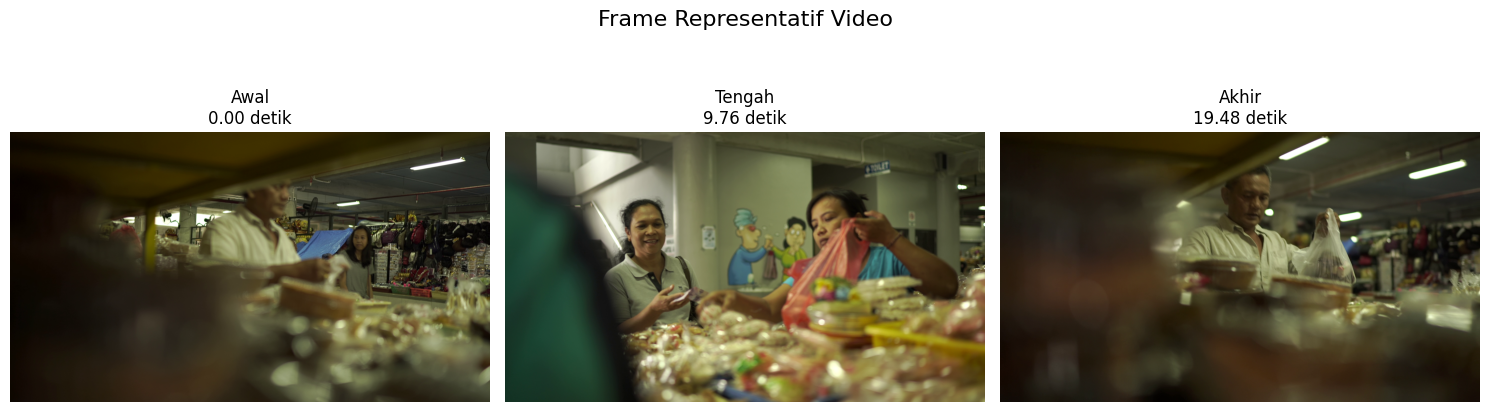

In [68]:
# === Buka video ===
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise FileNotFoundError(f"Tidak bisa membuka video: {video_path}")

# Ambil metadata dasar
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Tentukan index frame awal, tengah, akhir
frame_indices = [0, total_frames // 2, total_frames - 1]
frames = []
timestamps = []

for idx in frame_indices:
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)  # pindah ke frame tertentu
    ret, frame = cap.read()
    if ret:
        # Konversi BGR -> RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        timestamps.append(idx / fps)
    else:
        frames.append(None)
        timestamps.append(None)

cap.release()

# === Plot ketiga frame ===
plt.figure(figsize=(15, 5))
titles = ["Awal", "Tengah", "Akhir"]

for i, (frame, ts, title) in enumerate(zip(frames, timestamps, titles)):
    plt.subplot(1, 3, i+1)
    if frame is not None:
        plt.imshow(frame)
        plt.title(f"{title}\n{ts:.2f} detik")
    else:
        plt.text(0.5, 0.5, "Frame tidak terbaca", ha="center", va="center")
    plt.axis("off")

plt.suptitle("Frame Representatif Video", fontsize=16)
plt.tight_layout()
plt.show()

**Analisis Frame**

- **Frame awal (0.00 detik)**: Objek di depan kamera masih terlihat blur, fokus lebih ke suasana pasar dengan latar orang berdiri. Kesan yang ditangkap masih berupa pengenalan setting lokasi

- **Frame tengah (9.76 detik)**: Fokus kamera sudah tajam pada dua orang perempuan yang sedang berinteraksi sambil memegang kantong belanja. Ini menunjukkan aktivitas utama dan memberi konteks sosial dari video, yakni interaksi di pasar

- **Frame akhir (19.48 detik)**: Fokus kembali pada sosok laki-laki dengan kantong belanja di tangannya. Secara visual, ini memberikan penutup dengan menegaskan aktivitas transaksi yang sudah selesai

---

### C4. Analisis Ringkas (Wajib)

**Jawab pertanyaan berikut:**

**Kesesuaian parameter:** Apakah fps dan resolusi video ini sesuai untuk use case pilihan Anda (misalnya: media sosial, kuliah daring, presentasi, dll.)? Jelaskan alasan singkat.

*Jawaban Anda:*

Menurut saya, fps dan resolusi video ini sesuai untuk use case penayangan digital short film cinematic, sehingga detail visual tetap tajam. Frame rate ```23.98 fps``` juga selaras dengan standar industri film (≈24 fps) yang memberikan kesan sinematik alami pada gerakan. Jadi, kombinasi resolusi dan fps ini memang ideal untuk mendukung estetika visual film pendek sinematik

# Perbandingan & Kesimpulan

## Perbandingan Representasi Media

**TODO:** Bandingkan secara ringkas representasi dan visualisasi ketiga media:

### Audio (1D - Temporal)
- Representasi: Deretan sample amplitudo terhadap waktu (sinyal 1D)
- Visualisasi utama: Waveform, Spectogram, dan MFCC
- Informasi yang diperoleh: 
    - Karakter suara (keras/lemah, stabil/berubah)
    - Distribusi energi: terlihat energi dominan di frekuensi rendah hingga menengah (0–5 kHz), khas musik atau suara utama
    - Polanya berulang: menunjukkan ritme musik khas buatan Pharrell Williams

### Gambar (2D - Spasial)  
- Representasi: Disajikan sebagai matriks dua dimensi berisi nilai warna RGB dari setiap piksel pada posisi koordinat (x, y)
- Visualisasi utama: Tampilan citra dalam format RGB dan BGR serta histogram distribusi warna
- Informasi yang diperoleh: Tingkat kontras gambar, warna-warna yang paling dominan, metadata atau detail teknis gambar, serta hubungan antara histogram (frekuensi dan intensitas piksel) dengan tampilan visual gambar yang dimuat    

### Video (2D + Waktu - Spatio-temporal)
- Representasi: Urutan frame gambar (2D) yang tersusun sepanjang waktu
- Visualisasi utama: Cuplikan frame representatif (awal, tengah, akhir) dan metadata (resolusi, fps, durasi)
- Informasi yang diperoleh: Gerakan, alur cerita, interaksi antar objek, serta kualitas teknis seperti resolusi dan frame rate

---

## Refleksi Pembelajaran

### 3 Poin yang Saya Pelajari:
1. Audio bisa diubah ke bentuk visual (waveform, spectrogram, MFCC) untuk memahami isi tanpa harus mendengarkan langsung.
2. Gambar dapat dianalisis tidak hanya dari tampilan visual, tapi juga distribusi warna dan representasi numeriknya 
3. Video menggabungkan informasi spasial (gambar) dan temporal (waktu), sehingga analisisnya mencakup alur pergerakan dan kualitas teknis

### 2 Hal yang Masih Membingungkan/Ingin Diperdalam:
1. Bagaimana cara menghubungkan hasil analisis audio (seperti MFCC) dengan pengenalan pola nyata, misalnya untuk speech recognition
2. Elaborasi MFCC lebih lanjut

---

## Sumber Data & Referensi

**TODO:** Cantumkan semua sumber data dan referensi yang digunakan:

- **Audio:** [Take A Drive by Rex Orange County](https://youtu.be/P8-3tc_qfbQ?si=pcWeAhvnk9k8i-kE)
- **Gambar:** [Postingan Instagram IU](https://www.instagram.com/p/DOZiPSnkprB/?utm_source=ig_web_copy_link&igsh=MzRlODBiNWFlZA==)
- **Video:** [Ferry Irwandi Stock Footage Indonesia](https://drive.google.com/file/d/1TYMHzUF6qPFCRtK1glhS36b98AS8n_j9/view?usp=drive_link) 
- **Referensi teknis:** 
    - https://github.com/informatika-itera/IF25-40305-handson
    - [Plotting color channel histogram](https://towardsdev.com/how-to-plot-color-channels-histogram-of-an-image-in-python-using-opencv-40022032e127)
    - [OpenCV Histogram Calculation](https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html)
    - [Audio Analysis with Librosa](https://medium.com/neurotech-africa/audio-analysis-with-librosa-258c55e6e561)
    - [MFCC implementation and Tutorial](https://www.kaggle.com/code/ilyamich/mfcc-implementation-and-tutorial?utm_source=chatgpt.com)
    - [Chat dengan GPT](https://chatgpt.com/share/68c447b9-a8e8-8006-9ecf-66415ce118b0)
